In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/Users/kunthshah/Desktop/Crypto-Price-Moevement-Prediction/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df_original = pd.read_csv('Dataset/crypto_price_movement_dataset.csv')
df_original.head()

,Date,Open_Price,Close_Price,High_Price,Low_Price,Price_Change,Volume,MA_5,MA_10,RSI,Volatility,Sentiment_Score,Global_Economy,Event_Impact,Price_Movement
0,2023-01-01,41236.203565,41583.440143,42164.219187,41514.228466,347.236578,6746503,0.000000,0.0,39.782970,0.011679,0.806251,1,0.052810,1
1,2023-01-02,58521.429192,58515.946236,59042.917886,57930.249488,-5.482956,6569064,0.000000,0.0,52.667760,0.042812,0.010386,0,0.082150,0
2,2023-01-03,51959.818254,51655.283865,52006.320815,50856.415124,-304.534389,8066677,0.000000,0.0,30.473258,0.031347,0.555665,1,0.092787,0
3,2023-01-04,47959.754526,48196.396313,48689.608970,47431.923218,236.641787,8759881,0.000000,0.0,54.708497,0.038986,-0.563440,0,0.079497,1
4,2023-01-05,34680.559213,34599.237349,34964.333984,33761.841141,-81.321864,7696906,46910.060781,0.0,30.916759,0.045281,0.242467,0,0.064309,0


In [4]:
df = df_original.copy()
df['Date'] = pd.to_datetime(df_original['Date'], format='%Y-%m-%d')
df.dtypes

Date               datetime64[ns]
Open_Price                float64
Close_Price               float64
High_Price                float64
Low_Price                 float64
Price_Change              float64
Volume                      int64
MA_5                      float64
MA_10                     float64
RSI                       float64
Volatility                float64
Sentiment_Score           float64
Global_Economy              int64
Event_Impact              float64
Price_Movement              int64
dtype: object

In [5]:
df.index = df.pop('Date')

In [6]:
df.head()

,Open_Price,Close_Price,High_Price,Low_Price,Price_Change,Volume,MA_5,MA_10,RSI,Volatility,Sentiment_Score,Global_Economy,Event_Impact,Price_Movement
Date,,,,,,,,,,,,,,
2023-01-01,41236.203565,41583.440143,42164.219187,41514.228466,347.236578,6746503,0.000000,0.0,39.782970,0.011679,0.806251,1,0.052810,1
2023-01-02,58521.429192,58515.946236,59042.917886,57930.249488,-5.482956,6569064,0.000000,0.0,52.667760,0.042812,0.010386,0,0.082150,0
2023-01-03,51959.818254,51655.283865,52006.320815,50856.415124,-304.534389,8066677,0.000000,0.0,30.473258,0.031347,0.555665,1,0.092787,0
2023-01-04,47959.754526,48196.396313,48689.608970,47431.923218,236.641787,8759881,0.000000,0.0,54.708497,0.038986,-0.563440,0,0.079497,1
2023-01-05,34680.559213,34599.237349,34964.333984,33761.841141,-81.321864,7696906,46910.060781,0.0,30.916759,0.045281,0.242467,0,0.064309,0


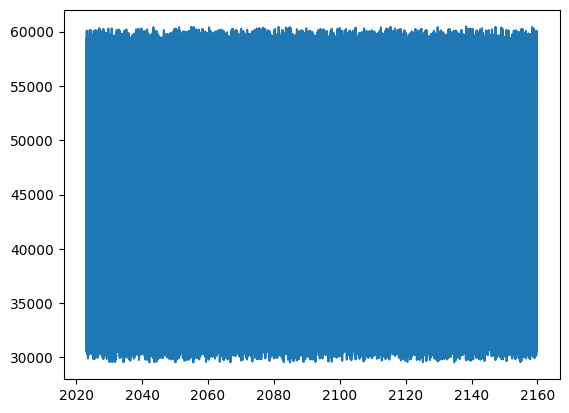

In [8]:
plt.plot(df.index, df['Close_Price'])

In [43]:
df = df[-int(len(df)*0.01):]

In [44]:
#Create a new data frame with only the Date and Close_Price columns

df = df[['Close_Price']]
df.head()

,Close_Price
Date,
2159-10-05,40063.152438
2159-10-06,50985.094136
2159-10-07,37415.504546
2159-10-08,39400.093463
2159-10-09,37571.651562


In [45]:
window_size = 5
X_list = []
y_list = []

# Create sliding windows: each window consists of 5 consecutive Close_Price values,
# and the target is the immediate next Close_Price
for i in range(len(df) - window_size):
    window = df.iloc[i:i+window_size]['Close_Price'].values
    target = df.iloc[i+window_size]['Close_Price']
    X_list.append(window)
    y_list.append(target)

# Create a new dataframe with the windows and their corresponding target values
windowed_df = pd.DataFrame({
    'Window': X_list,
    'Target': y_list
})

windowed_df.head()

,Window,Target
0,"[40063.152437769626, 50985.09413622878, 37415....",46909.003580
1,"[50985.09413622878, 37415.50454626056, 39400.0...",36644.511204
2,"[37415.50454626056, 39400.09346256052, 37571.6...",51110.035060
3,"[39400.09346256052, 37571.65156218126, 46909.0...",50286.616239
4,"[37571.65156218126, 46909.00357961202, 36644.5...",42306.415381


In [46]:
def windowed_df_to_date_X_y(windowed_dataframe):
    # Use the global df and window_size to get the dates corresponding to the target values.
    dates = df.index[window_size:]
    
    # Convert the list of windows into a NumPy array, then reshape to (n_samples, window_size, 1)
    X = np.stack(windowed_dataframe['Window'].values)
    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    # Convert the target column to a NumPy array of type float32
    Y = windowed_dataframe['Target'].values.astype(np.float32)
    
    print("X shape:", X.shape)
    print("Y shape:", Y.shape)
    print("dates shape:", dates.shape)
    
    return dates, X, Y

dates, X, y = windowed_df_to_date_X_y(windowed_df)

X shape: (45, 5, 1)
Y shape: (45,)
dates shape: (45,)


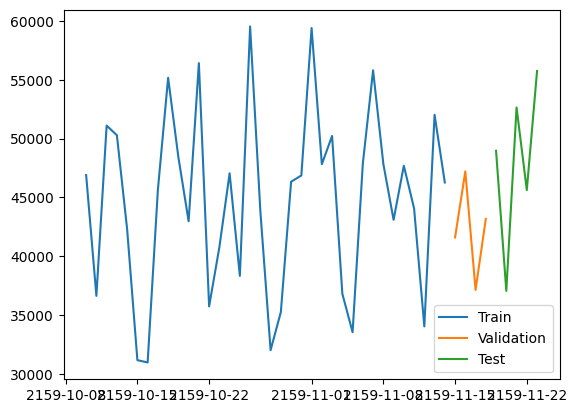

In [47]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 2058318208.0000 - mean_absolute_error: 44674.5352 - val_loss: 1801408768.0000 - val_mean_absolute_error: 42289.5859
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2047382528.0000 - mean_absolute_error: 44587.1680 - val_loss: 1801398528.0000 - val_mean_absolute_error: 42289.4609
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2044061184.0000 - mean_absolute_error: 44540.8750 - val_loss: 1801389568.0000 - val_mean_absolute_error: 42289.3594
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2048078976.0000 - mean_absolute_error: 44575.4141 - val_loss: 1801380352.0000 - val_mean_absolute_error: 42289.2500
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2057330560.0000 - mean_absolute_error: 44676.2305 - val_loss: 1801371520.0000 - val_mean_absolute_error: 42289.1406
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2077595008.0000 - mean_absolute_error: 44912.6172 - val_loss: 1801365248.0000

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


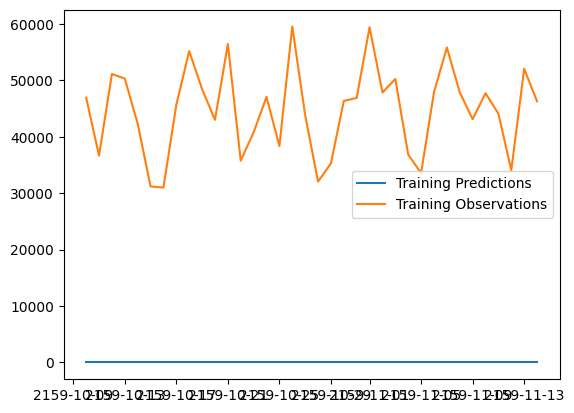

In [49]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


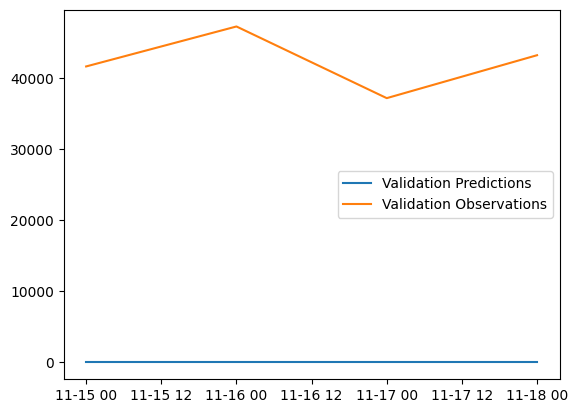

In [50]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


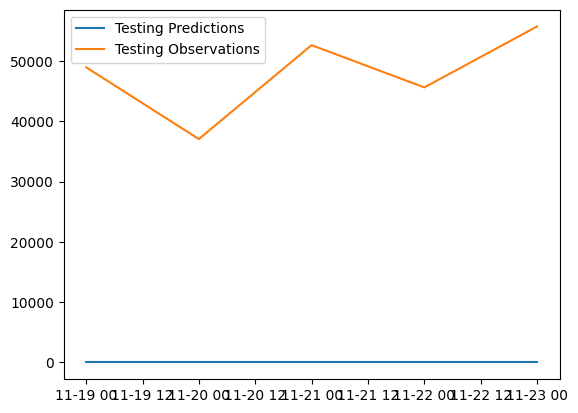

In [51]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

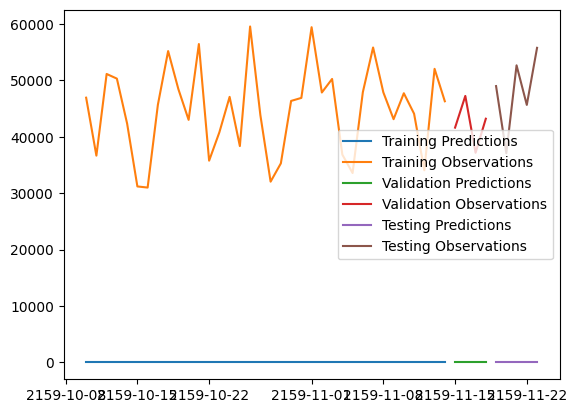

In [52]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [53]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


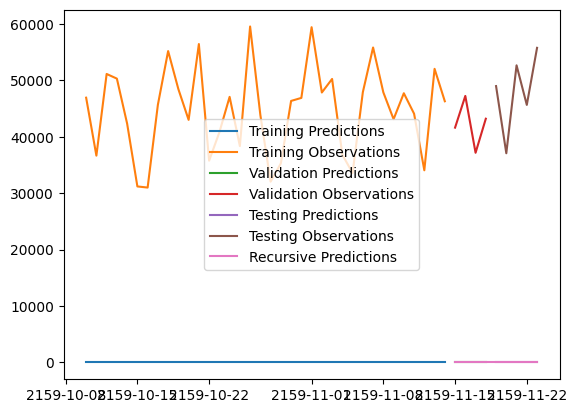

In [54]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])